In [1]:
import matplotlib.pyplot as plt

[Structure Summary
Lattice
    abc : 18.27647431411415 17.27469970119811 25.32692070400461
 angles : 90.00071648254777 89.99623322242539 90.00428339182713
 volume : 7996.230696651631
      A : 18.27647429 -0.00071844 0.00060439
      B : -0.00061238 17.27469969 -0.00010899
      C : 0.00082751 -0.00015689 25.32692069
    pbc : True True True
PeriodicSite: Cs (8.4604, 8.8835, 3.1792) [0.4629, 0.5143, 0.1255]
PeriodicSite: Cs (8.4604, 8.8850, 15.8172) [0.4629, 0.5144, 0.6245]
PeriodicSite: Cs (8.4542, 0.1952, 3.1506) [0.4626, 0.0113, 0.1244]
PeriodicSite: Cs (8.4562, 0.1983, 15.8432) [0.4627, 0.0115, 0.6255]
PeriodicSite: Cs (17.5901, 8.8581, 3.1621) [0.9625, 0.5128, 0.1248]
PeriodicSite: Cs (17.5905, 8.8559, 15.8353) [0.9625, 0.5127, 0.6252]
PeriodicSite: Cs (17.5845, 0.2218, 3.1578) [0.9621, 0.0129, 0.1247]
PeriodicSite: Cs (17.5855, 0.2258, 15.8361) [0.9622, 0.0131, 0.6252]
PeriodicSite: Cs (3.8851, 4.0964, 3.1576) [0.2126, 0.2371, 0.1247]
PeriodicSite: Cs (3.8860, 4.0964, 15.8377) [0

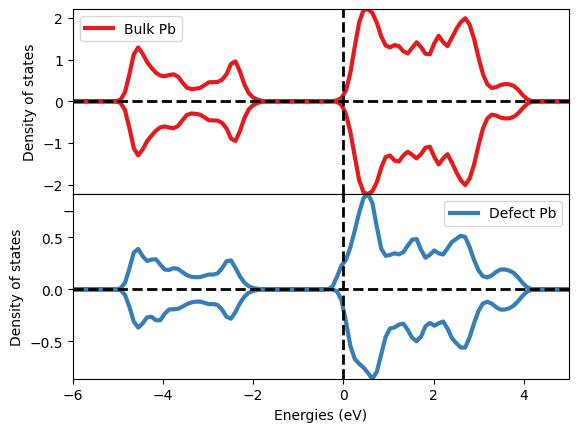

In [2]:
from dos_plotter_axes_edited import DosPlotterAxesEdited
from pymatgen_electronic_structure_dos_edited import CompleteDos, add_densities
from pymatgen_io_vasp_output_edited import Vasprun
import numpy as np

plotter = DosPlotterAxesEdited(zero_at_efermi=True, stack=False, sigma=0.1)
fig, ax = plt.subplots(2,1)
fig.subplots_adjust(hspace=0)

vasprun = Vasprun('./vasprun.xml', parse_potcar_file=False)
cdos = vasprun.complete_dos
tdos = vasprun.tdos
struct = vasprun.structures
efermi = vasprun.efermi

bulk_list = [49, 53, 50, 33, 61, 57]
site_list1 = [bulk_list[i] - 1 for i in range(len(bulk_list))]
sum_site_dos1 = {}
densities1 = {}
energies1 = []
for site in site_list1:
    site_dos1 = cdos.get_site_dos(struct[0][site])
    sum_site_dos1[site] = site_dos1
energies1 = sum_site_dos1[site_list1[0]].energies - efermi
density_init1 = sum_site_dos1[site_list1[0]].get_smeared_densities(sigma=0.1)
densities1 = {spin: np.array(density_init1[spin]) for spin in density_init1.keys()}
for site in site_list1[1:]:
    density1 = sum_site_dos1[site].get_smeared_densities(sigma=0.1)
    densities1 = {spin: np.array(densities1[spin]) + np.array(density1[spin]) for spin in density1.keys()}

plotter.add_sum_dos(label='Bulk Pb', energies=energies1, densities=densities1, efermi=efermi)
plotter.get_sum_plot(label='Bulk Pb', energies=energies1, densities=densities1, ax=ax[0], color_index=0, xlim=(-6,5))
plotter.clean_sum_dos(label='Bulk Pb', densities=densities1, energies=energies1)

defect_list = [47, 64]
site_list2 = [defect_list[i] - 1 for i in range(len(defect_list))]
sum_site_dos2 = {}
sum_densities2 = {}
energies2 = []
for site in site_list2:
    site_dos2 = cdos.get_site_dos(struct[0][site])
    sum_site_dos2[site] = site_dos2
energies2 = sum_site_dos2[site_list2[0]].energies - efermi
density_init2 = sum_site_dos2[site_list2[0]].get_smeared_densities(sigma=0.1)
sum_densities2 = {spin: np.array(density_init2[spin]) for spin in density_init2.keys()}
for site in site_list2[1:]:
    densities2 = sum_site_dos2[site].get_smeared_densities(sigma=0.1)
    sum_densities2 = {spin: np.array(sum_densities2[spin]) + np.array(densities2[spin]) for spin in densities2.keys()}

plotter.get_sum_plot(label='Defect Pb', energies=energies2, densities=sum_densities2, ax=ax[1], color_index=1, xlim=(-6,5))
plt.show()


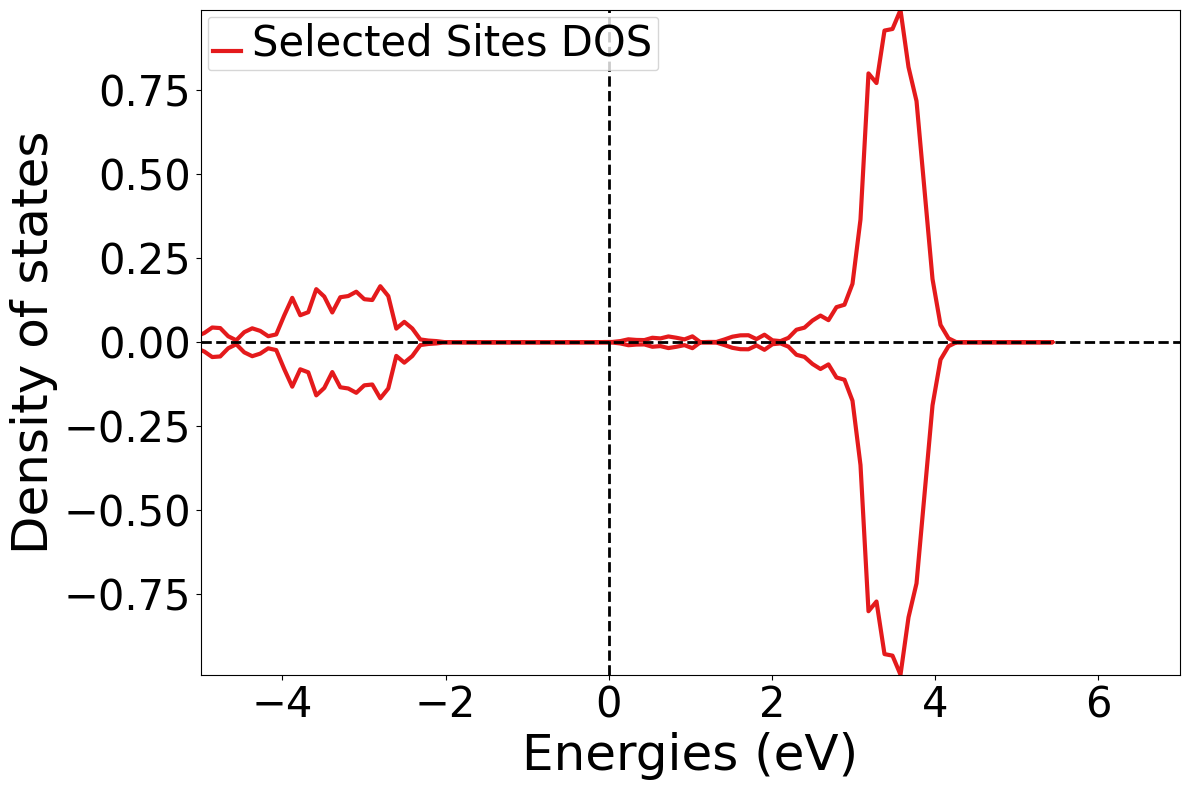

In [9]:
from pymatgen.electronic_structure.dos import CompleteDos
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.io.vasp import Vasprun
# make vasrun usable
vasprun = Vasprun("./vasprun.xml")
dos = vasprun.complete_dos
# sites to extract the DOS
site_indices = [0, 5, 8]
# Extract the DOS and sum
selected_dos = None
for site_index in site_indices:
    site_dos = dos.get_site_dos(dos.structure[site_index])
    if selected_dos is None:
        selected_dos = site_dos
    else:
        selected_dos += site_dos
# Plot the DOS
dosplotter = DosPlotter()
dosplotter.add_dos("Selected Sites DOS", selected_dos)
dosplotter.get_plot(xlim=(-5, 7)).show()